# 🧠 Introduction to LSTMs for AI Beginners

## 👋 Welcome to Your Journey into LSTMs!

Welcome! In this 2-hour session, we're going to explore one of the most powerful tools in AI for understanding sequences: **Long Short-Term Memory (LSTM) networks**.

Have you ever wondered how your phone finishes your sentences, or how Siri understands you? Often, the answer involves LSTMs or similar technologies. LSTMs are a special type of Recurrent Neural Network (RNN) that are brilliant at remembering information for a long time. This 'memory' makes them perfect for working with data that comes in a sequence, like text, speech, or stock prices.

### 🎯 Learning Objectives for Today

By the end of this session, you will be able to:
1.  **Understand** why we need LSTMs and the problem they solve (the vanishing gradient problem).
2.  **Explain** the core idea of an LSTM cell, including its 'gates'.
3.  **Build** a simple LSTM model using Python and TensorFlow/Keras.
4.  **Train** your model on time-series data and make predictions.
5.  **Feel confident** to explore more advanced sequence models!

--- 
## Topic 1: Why Do We Need LSTMs? The Memory Problem

📄 **Explanation**

Standard neural networks are great, but they have a major limitation: they have no memory of the past. A simple Recurrent Neural Network (RNN) was created to solve this. It can remember previous information to influence the current output. 

However, simple RNNs have a **short-term memory**. Imagine reading a very long book. A simple RNN might remember the previous sentence, but it would likely forget what happened in the first chapter! This is called the **vanishing gradient problem**—as information travels through the network over many steps, it gets weaker and weaker until it vanishes. 

This is where LSTMs come in. They were specifically designed to have a **long-term memory**, allowing them to remember important information from many steps ago.

### 🤔 Practice Task (Conceptual)

Think about the sentence: *"I grew up in France, where the culture is amazing. That's why I speak fluent French."*

Why would a simple RNN struggle to connect the word **"French"** at the end of the sentence with the word **"France"** at the beginning? Write your answer in the cell below (no code required).

*Your answer here...*

--- 
## Topic 2: Inside an LSTM Cell 🧠

📄 **Explanation**

The magic of an LSTM happens inside its repeating modules, called **cells**. Think of a cell as a mini-computer with its own memory and a few controllers.

The two most important parts are:

1.  **Cell State (C_t):** This is the **long-term memory**. It runs like a conveyor belt through the entire chain of cells, carrying information from the past. Information can be added to or removed from this belt at each step.
2.  **Gates:** These are the **controllers**. They are small neural networks that decide what information is allowed to go into or out of the cell state. They are the gatekeepers of memory!

💡 **Fun Fact:** LSTMs were invented by Sepp Hochreiter and Jürgen Schmidhuber way back in 1997. Their work solved a major problem that was holding back AI!

--- 
## Topic 3: The Three Gates of Memory 🚪

📄 **Explanation**

An LSTM cell uses three special 'gates' to control its memory (the cell state). Each gate is like a switch that can be turned on or off (or somewhere in between) to let information pass through.

1.  **Forget Gate (f_t)** 🗑️
    *   **Job:** To decide what information to **throw away** from the long-term memory (cell state).
    *   *Example:* When reading "The movie was boring, **but** the acting was good," the forget gate might decide to forget the 'negative' sentiment when it sees the word "but".

2.  **Input Gate (i_t)** 📥
    *   **Job:** To decide what **new information** to store in the long-term memory.
    *   *Example:* After seeing "...the acting was good," the input gate will add 'positive' sentiment to the memory.

3.  **Output Gate (o_t)** 📤
    *   **Job:** To decide what the LSTM's **output** (or short-term memory) should be right now, based on the current long-term memory.
    *   *Example:* At the end of the sentence, the output gate uses the final cell state (which now contains both positive and negative info) to give a nuanced prediction.

### 🎯 Practice Task

Imagine an LSTM is processing a weather report: *"Today was sunny and warm. A storm is forecast for tomorrow."*

When the LSTM reads the second sentence, what do you think the **Forget Gate** and **Input Gate** will do? Describe it simply.

*Your answer here...*
*   **Forget Gate:** ...
*   **Input Gate:** ...

--- 
## Topic 4: Let's Code! Building an LSTM for Time-Series Forecasting 💻

📄 **Explanation**

Time for the fun part! We're going to build a simple LSTM model to predict the next value in a sequence. We'll use a simple sine wave as our data. A sine wave is a repeating pattern, so it's a perfect first task for our LSTM to learn.

We will use the **TensorFlow** and **Keras** libraries, which make building complex models like LSTMs very easy.

In [11]:
# Step 1: Import the libraries we need
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt # To visualize our data

print("Libraries imported successfully!")

ModuleNotFoundError: No module named 'tensorflow'

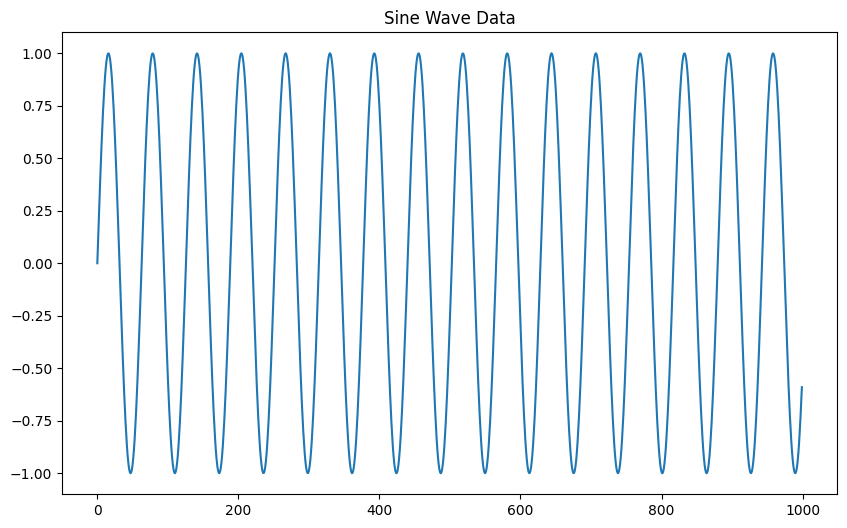

In [3]:
# Step 2: Prepare our data (a simple sine wave)
# We will create a sequence of numbers that follow a sine wave pattern.
data = np.sin(np.arange(0, 100, 0.1))

# Let's visualize it to see what it looks like
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Sine Wave Data")
plt.show()

In [4]:
# Now, we format the data for the LSTM.
# The LSTM will look at 'n_steps' of data to predict the next one.
n_steps = 10 
X, y = [], []

for i in range(len(data) - n_steps):
    # Take a sequence of 10 points as input (X)
    X.append(data[i:i + n_steps])
    # The very next point is our target output (y)
    y.append(data[i + n_steps])

# Convert to NumPy arrays and reshape for the LSTM layer
X = np.array(X).reshape(-1, n_steps, 1)
y = np.array(y)

print(f"Shape of our training data (X): {X.shape}")
print(f"Shape of our target data (y): {y.shape}")

Shape of our training data (X): (990, 10, 1)
Shape of our target data (y): (990,)


In [ ]:
# Step 3: Build the LSTM model
# We use a Sequential model, which means we add layers one by one.

model = Sequential([
    # The LSTM layer with 50 memory units. 
    # 'relu' is a common activation function that helps the network learn.
    # 'input_shape' tells the model what our data looks like: sequences of 10 steps with 1 feature.
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    
    # The Dense layer is a standard fully connected layer. 
    # We use 1 unit because we want to predict a single value.
    Dense(1)
])

# Let's see a summary of our model
model.summary()

In [ ]:
# Step 4: Compile and Train the model
# Compile the model: This sets up the learning process.
# 'optimizer' is the algorithm that adjusts the model to minimize error (e.g., 'adam' is a popular choice).
# 'loss' is how we measure the model's error (e.g., 'mse' stands for mean squared error).

model.compile(optimizer='adam', loss='mse')

# Train the model: This is where the learning happens!
# We show the model our data (X and y) for a number of 'epochs' (full passes through the data).
# verbose=1 will show us the training progress.
# NOTE: We are using 50 epochs to make it run fast in class. For better results, you'd use more (e.g., 200).

print("Training the model...")
model.fit(X, y, epochs=50, verbose=1)
print("✅ Training complete!")


In [ ]:
# Step 5: Make a prediction!

# Let's take the last 10 points from our original data to predict the next one.
test_input = np.array(data[-n_steps:]).reshape((1, n_steps, 1))

# Use the trained model to predict
predicted_value = model.predict(test_input, verbose=0)

# The actual next value would be np.sin(100)
actual_value = np.sin(np.arange(0, 100.1, 0.1))[-1]

print("--- Prediction Result ---")
print(f"Last 10 points of data used for prediction: \n{test_input.flatten()}\n")
print(f"🔮 Predicted next value: {predicted_value[0][0]}")
print(f"🎯 Actual next value: {actual_value}")

### 🎯 Practice Task: Experiment!

Now it's your turn to be the data scientist! Copy the code from the last three cells into the cell below and make these changes:

1.  Change the number of LSTM units from `50` to `100`.
2.  Change the number of `epochs` from `50` to `100`.

🧪 Re-run the code. Does the prediction get closer to the actual value? Experimentation is key to machine learning!

In [ ]:
# Your code for the practice task here!
# 1. Rebuild the model with 100 units

# 2. Re-compile the model

# 3. Re-train the model for 100 epochs

# 4. Make a new prediction and print it

--- 
## 🚀 Final Revision Assignment

Congratulations on making it this far! To help solidify what you've learned, here are a few tasks to practice at home. They combine everything we've covered today.

**Task 1: Multiple Choice**
What is the primary function of the "forget gate" in an LSTM cell?
   * a) To decide what new information to add to the cell state.
   * b) To determine what information to discard from the previous cell state.
   * c) To regulate the output of the cell.
   * d) To calculate the candidate values for the new cell state.

**Task 2: Short Answer**

In 1-2 sentences, explain why LSTMs are better at handling long-term dependencies (like in a long story) compared to simple RNNs.

**Task 3: Problem-Solving**

An LSTM is processing a list of numbers: `[10, 20, 30, 100, 40, 50]`. The number `100` is an unusual spike. What gate would be most responsible for deciding whether to keep the memory of this spike or ignore it in the following steps? Explain why.

**Task 4: Real-World Scenario**

You are asked to build a model to predict daily stock prices for a company. Why would an LSTM be a good choice for this task? What kind of information would its 'cell state' (long-term memory) need to hold?

**Task 5: Coding Challenge**

Modify our sine wave code. Instead of `np.sin`, use `np.cos` to generate the data. Train the same LSTM model on this new cosine wave data. Does it still learn the pattern effectively? Paste your code in the cell below.

In [ ]:
# Your code for the cosine wave challenge here!

--- 
## 📚 Summary & Further Learning

### ✅ Key Takeaways

*   **What it is:** LSTMs are a type of RNN designed to learn long-term patterns in sequences.
*   **Why it Matters:** They solve the vanishing gradient problem, allowing them to remember information for much longer than simple RNNs.
*   **Core Idea:** The LSTM **cell** uses a **cell state** (long-term memory) and three **gates** (forget, input, output) to control the flow of information.
*   **Applications:** LSTMs are used everywhere, from Natural Language Processing (NLP) and speech recognition to time-series forecasting.

### 🔗 Great Resources to Continue Your Journey

*   **In-depth Blog Post:** ["Understanding LSTM Networks" by Christopher Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - A classic, highly-visual explanation.
*   **Online Course:** [Sequence Models on Coursera by deeplearning.ai](https://www.coursera.org/learn/nlp-sequence-models) - Covers RNNs, LSTMs, and their applications in depth.
*   **Documentation:**
    *   [TensorFlow LSTM Layer Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
    *   [PyTorch LSTM Module Documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)